<a href="https://colab.research.google.com/github/jovianparco/Numerical-Methods/blob/main/58015_Numerical_Differentiation_San.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Numerical Differentiation
© Bedana M., Enerio MM., Gonzales KC., Parco JA.

### Part 1

In [1]:
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
def diff_fwd(f,x,dx,degree=1):
  f_ans = f(x+((np.arange(degree,-1,-1))*dx))
  bin =  np.asarray([binom(degree,k) for k in range(degree+1)])
  bin[1::2] *= -1 
  diff = (bin @ f_ans) / dx**degree 
  return diff

In [3]:
def diff_bwd(f,x,dx,degree=1):
  f_ans = f(x+(np.arange(0,-(degree+1),-1))*dx)
  bin =  np.asarray([binom(degree,k) for k in range(degree+1)])
  bin[1::2] *= -1
  diff = (bin @ f_ans) / dx**degree
  return diff

In [4]:
def diff_cen(f,x,dx,degree=1):
  interval = (np.arange(np.ceil(degree/2),-(degree/2+1),-1))
  interval = interval if degree % 2 == 0 else np.delete(interval, int((degree/2)+0.5))
  f_ans = f(x+(interval)*dx)
  bin = np.asarray([binom(degree,k) for k in range(degree+1)]) if degree != 3 else np.asarray([1,2,2,1])
  bin[1::2] *= -1
  diff = (f_ans @ bin) / dx**degree if degree % 2 == 0 else (f_ans @ bin) / (2*dx**degree)
  return diff

####Y1

In [5]:
y1 = lambda x : ((4*x**2 + 2*x + 1)/(x+2*np.exp(x)))**x
x = 0.1
dx = 0.05
degree = 3

In [6]:
y1_diff_fwd, y1_diff_bwd, y1_diff_cen = [], [], []
for n in range(0,degree+1):
  y1_diff_fwd.append(diff_fwd(y1,x,dx,n))
  y1_diff_bwd.append(diff_bwd(y1,x,dx,n))
  y1_diff_cen.append(diff_cen(y1,x,dx,n))

In [7]:
y1_dict = {'Forward finite': y1_diff_fwd, 'Backward finite': y1_diff_bwd, 'Central finite': y1_diff_cen} 
df_y1 = pd.DataFrame(y1_dict)
df_y1

,Forward finite,Backward finite,Central finite
0,0.939668,0.939668,0.939668
1,-0.449916,-0.555191,-0.502554
2,2.103952,1.925049,2.105512
3,-1.984401,9.635605,1.789030


#### Y2

In [8]:
y2 = lambda x : (np.cos(2*x)) + ((x**2)/(20)) + (np.exp(-2*x))
x = 0.1
dx = 0.05
degree = 3

In [9]:
y2_diff_fwd, y2_diff_bwd, y2_diff_cen = [], [], []
for n in range(0,degree+1):
  y2_diff_fwd.append(diff_fwd(y2,x,dx,n))
  y2_diff_bwd.append(diff_bwd(y2,x,dx,n))
  y2_diff_cen.append(diff_cen(y2,x,dx,n))

In [10]:
y2_dict = {'Forward finite': y2_diff_fwd, 'Backward finite': y2_diff_bwd, 'Central finite': y2_diff_cen} 
df_y2 = pd.DataFrame(y2_dict)
df_y2

,Forward finite,Backward finite,Central finite
0,1.799297,1.799297,1.799297
1,-2.040352,-2.013385,-2.026869
2,-0.752419,-0.254334,-0.539347
3,-2.904800,-7.220019,-4.980852


#### Approximation Error

In [11]:
from scipy.misc import derivative  #Using Scipy derivative to get exact derivative for calculating the approximation error accurately 

In [12]:
y1_fwd_error, y1_bwd_error, y1_cen_error = [], [], []
for n in range(0,degree+1):
  y1_fwd_error.append(abs(derivative(y1,x,dx,n=n,order=5)-diff_fwd(y1,x,dx,n)))
  y1_bwd_error.append(abs(derivative(y1,x,dx,n=n,order=5)-diff_bwd(y1,x,dx,n)))
  y1_cen_error.append(abs(derivative(y1,x,dx,n=n,order=5)-diff_cen(y1,x,dx,n)))

In [13]:
y1_error_dict = {'FWD Error': y1_fwd_error, 'BWD Error': y1_bwd_error, 'CEN Error': y1_cen_error} 
df_y1_error = pd.DataFrame(y1_error_dict)
df_y1_error

,FWD Error,BWD Error,CEN Error
0,0.000000,0.000000,0.000000
1,0.053383,0.051892,0.000745
2,0.016730,0.195633,0.015169
3,3.773432,7.846575,0.000000


In [14]:
y2_fwd_error, y2_bwd_error, y2_cen_error = [], [], []
for n in range(0,degree+1):
  y2_fwd_error.append(abs(derivative(y2,x,dx,n=n,order=5)-diff_fwd(y2,x,dx,n)))
  y2_bwd_error.append(abs(derivative(y2,x,dx,n=n,order=5)-diff_bwd(y2,x,dx,n)))
  y2_cen_error.append(abs(derivative(y2,x,dx,n=n,order=5)-diff_cen(y2,x,dx,n)))

In [15]:
y2_error_dict = {'FWD Error': y2_fwd_error, 'BWD Error': y2_bwd_error, 'CEN Error': y2_cen_error} 
df_y2_error = pd.DataFrame(y2_error_dict)
df_y2_error

,FWD Error,BWD Error,CEN Error
0,0.000000,0.000000,0.000000
1,0.015559,0.011408,0.002075
2,0.207077,0.291008,0.005995
3,2.076052,2.239167,0.000000


In conclusion, Using Central finite differentiation can form a more accurate result that the Forward finite differentiation and Backward finite differentiation

### Part 2

In [16]:
def taylor(funct, dX, nth_order,x):
  if nth_order % 2 == 0:
    o = nth_order+1
  else:
    o = nth_order+2
  a = 2* np.pi
  y_nth = 0
  for n in range(nth_order+1):
    y_nth = y_nth + (derivative(funct,a,dX,n,order=o)*((x-a)**n)/math.factorial(n))
  return y_nth

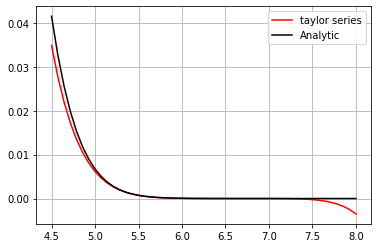

In [17]:
x = np.linspace(4.5,8)
plt.plot(x,taylor(y1, .01, 7,x),label='taylor series',c = "r")
plt.plot(x,y1(x),label='Analytic',c="k")
plt.legend()
plt.grid()
plt.show()

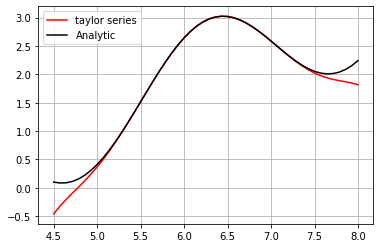

In [18]:
x = np.linspace(4.5,8)
plt.plot(x,taylor(y2, 1e-2, 7,x),label='taylor series',c = "r")
plt.plot(x,y2(x),label='Analytic',c="k")
plt.legend()
plt.grid()
plt.show()

### REFERENCE:

[1] H. Hae--Jin Choi Jin Choi, “Numerical Differentiation Numerical Differentiation Chapter Objectives Chapter Objectives,” 2010.Access on:May 13 2021[online]. Available : [https://www.uio.no/studier/emner/matnat/math/MAT-INF1100/h08/kompendiet/diffint.pdf](https://www.uio.no/studier/emner/matnat/math/MAT-INF1100/h08/kompendiet/diffint.pdf)
<br> [2] Q.Kong,T.Shiauw,A.Bayen, "Python Programming And Numerical Method ",2020. Access in: May 13 2021 [online]. Available : [(pythonnumericalmethods.berkeley.edu/notebooks/chapter18.02-Approximations-with-Taylor-Series.htm)](pythonnumericalmethods.berkeley.edu/notebooks/chapter18.02-Approximations-with-Taylor-Series.htm)

